## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
X, y = make_classification(n_samples=10000, n_features=8, n_informative=5, class_sep = 2, random_state = 42)
print(X.shape, y.shape)
data = pd.DataFrame(data= np.c_[X,y])
#X = pd.DataFrame(X) y = pd.DataFrame(y)

(10000, 8) (10000,)


In [4]:
data

,0,1,2,3,4,5,6,7,8
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0.0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1.0
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0.0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0.0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0.0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0.0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0.0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1.0
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1.0


In [5]:
# Check duplicate values and missing data.
data.describe()

,0,1,2,3,4,5,6,7,8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.004918,0.982548,0.003020,1.071892,0.995967,-1.869138,-0.001747,0.994744,0.499400
std,2.125161,2.236374,1.016612,2.571314,2.161592,2.587044,2.446634,2.266276,0.500025
min,-7.361942,-6.334871,-3.531879,-6.507147,-6.124101,-10.552410,-8.263252,-6.274545,0.000000
25%,-2.575438,-0.418504,-0.673464,-1.196634,-0.507065,-3.750591,-1.984409,-0.594088,0.000000
50%,-1.448219,1.414705,0.013764,1.182811,1.478394,-1.769049,0.215688,1.373192,0.000000
75%,0.666344,2.548942,0.680873,3.296581,2.529939,0.072616,1.985890,2.617999,1.000000
max,6.445003,7.784181,3.443926,8.484377,7.824402,5.853682,6.944183,7.815690,1.000000


In [6]:
data.duplicated().any()

False

In [7]:
data.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [8]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

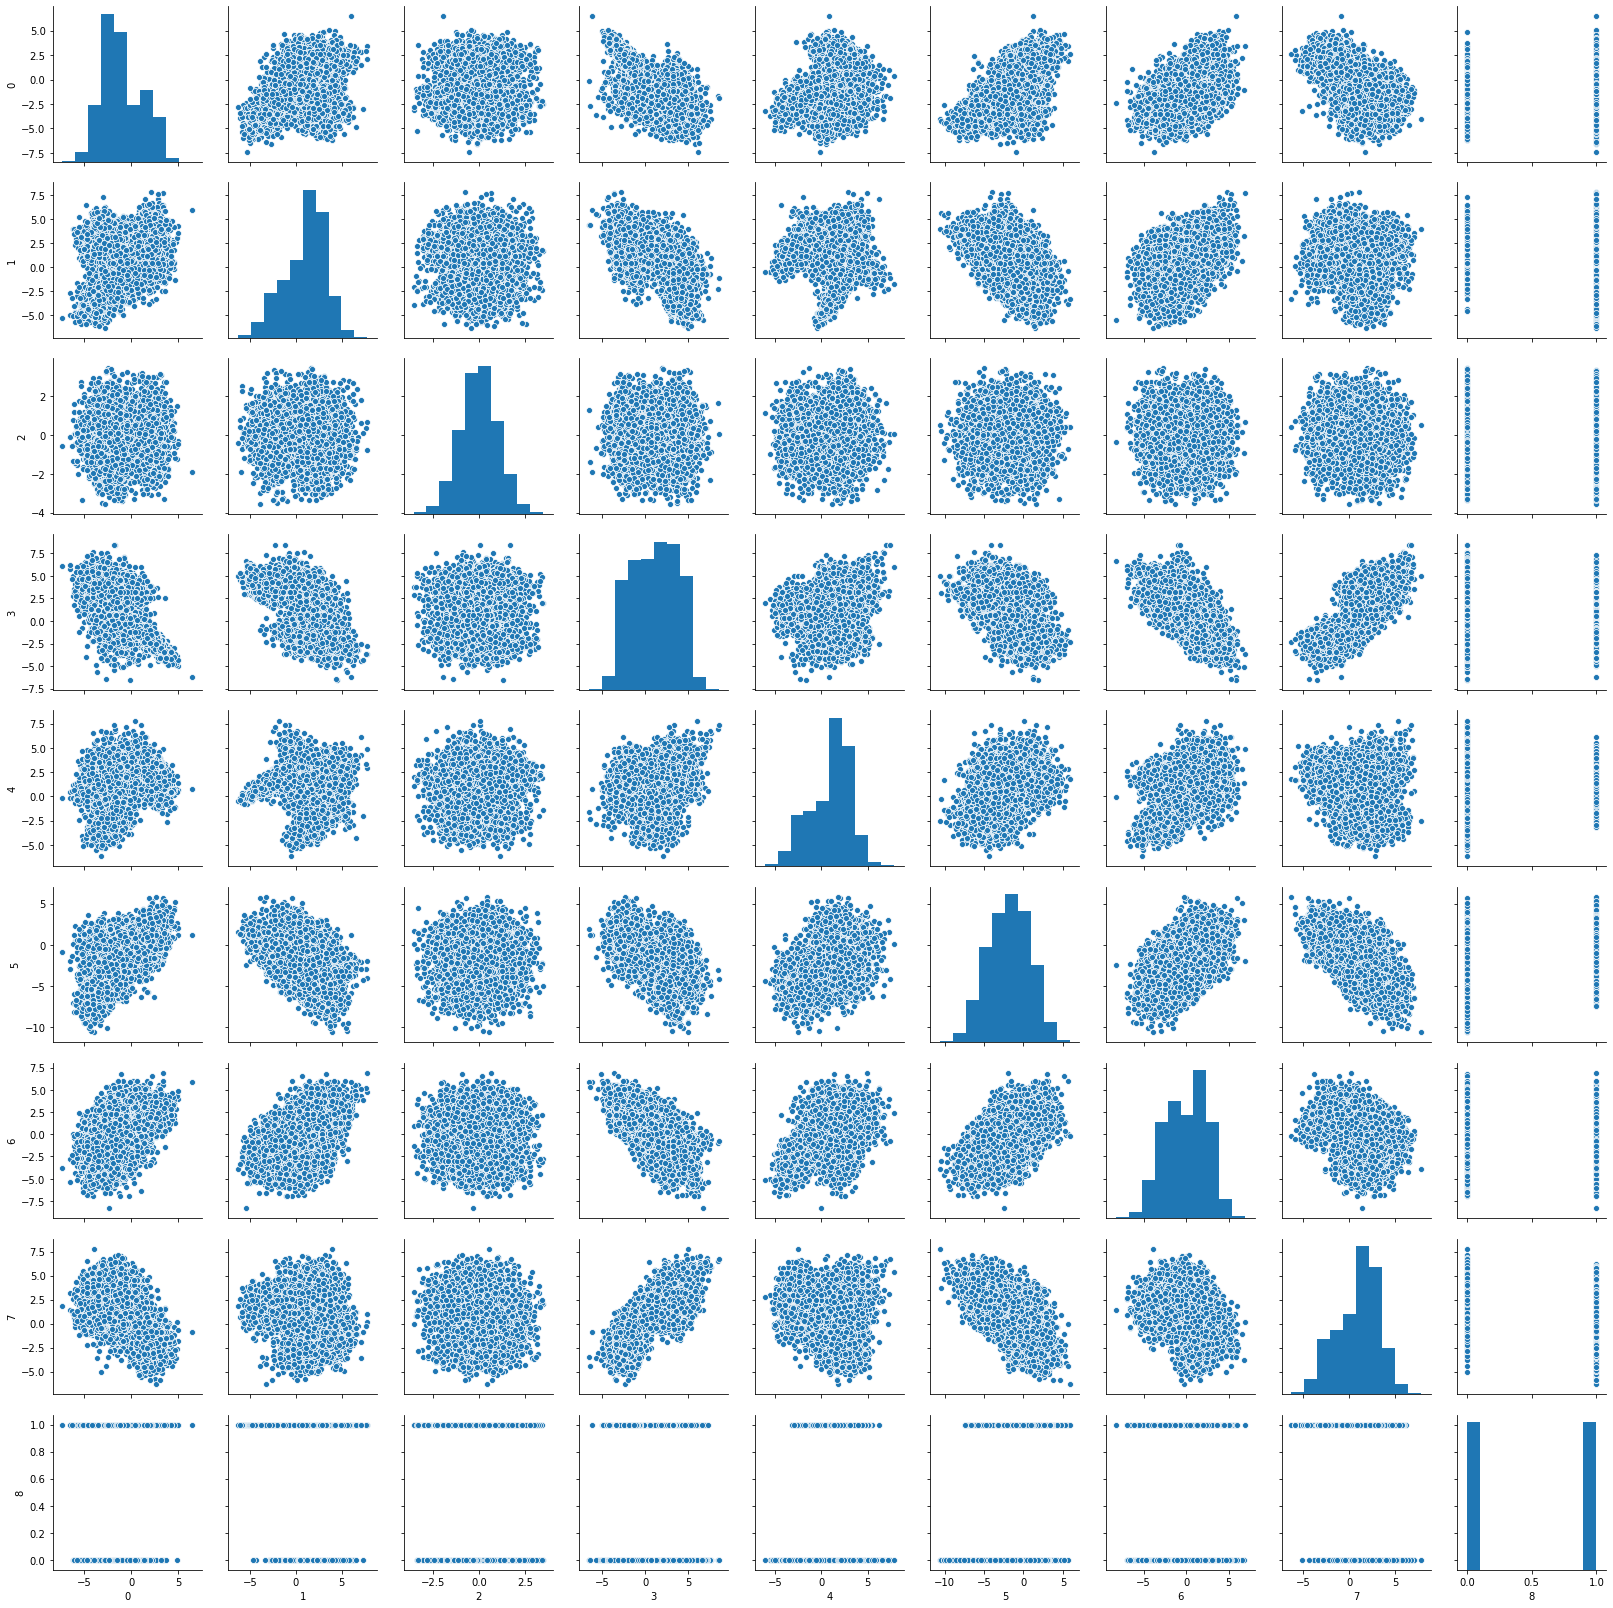

In [9]:
# Visualize data for each feature (pairplot,distplot).
sns.pairplot(data)

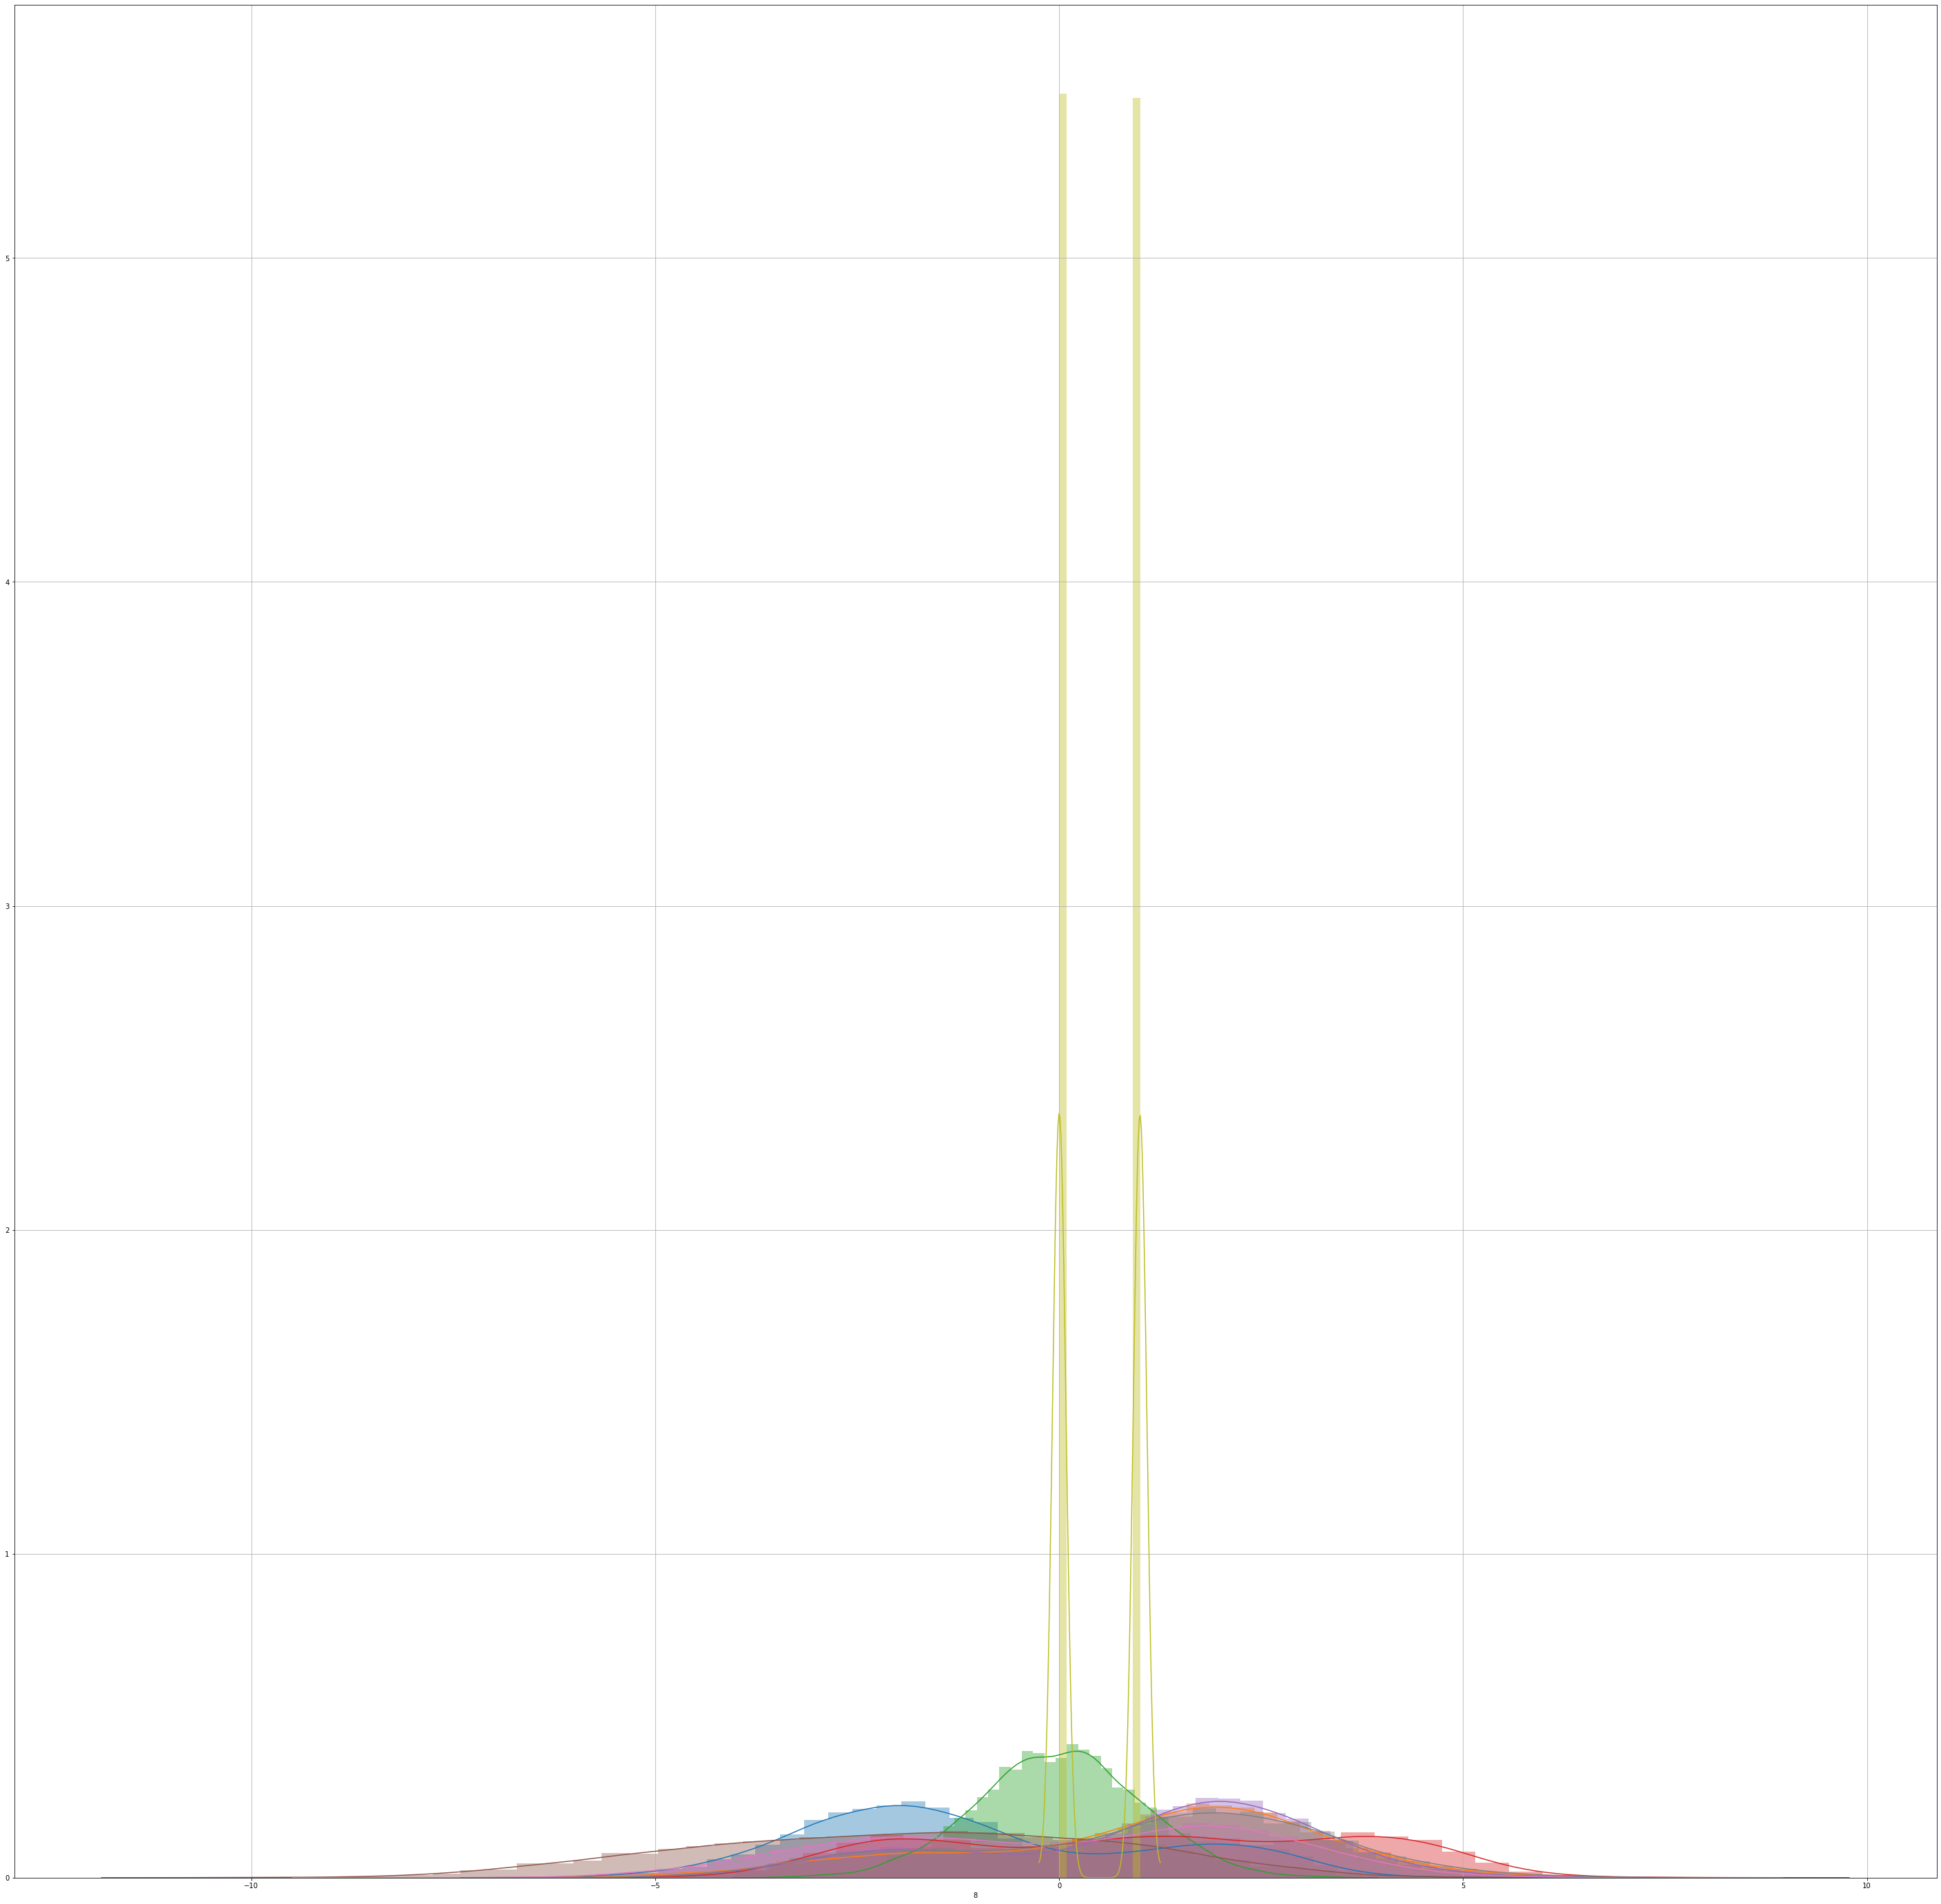

In [10]:
plt.figure(figsize=(50, 50))
plt.grid(True)

for col in data.columns:
    sns.distplot(data[col])

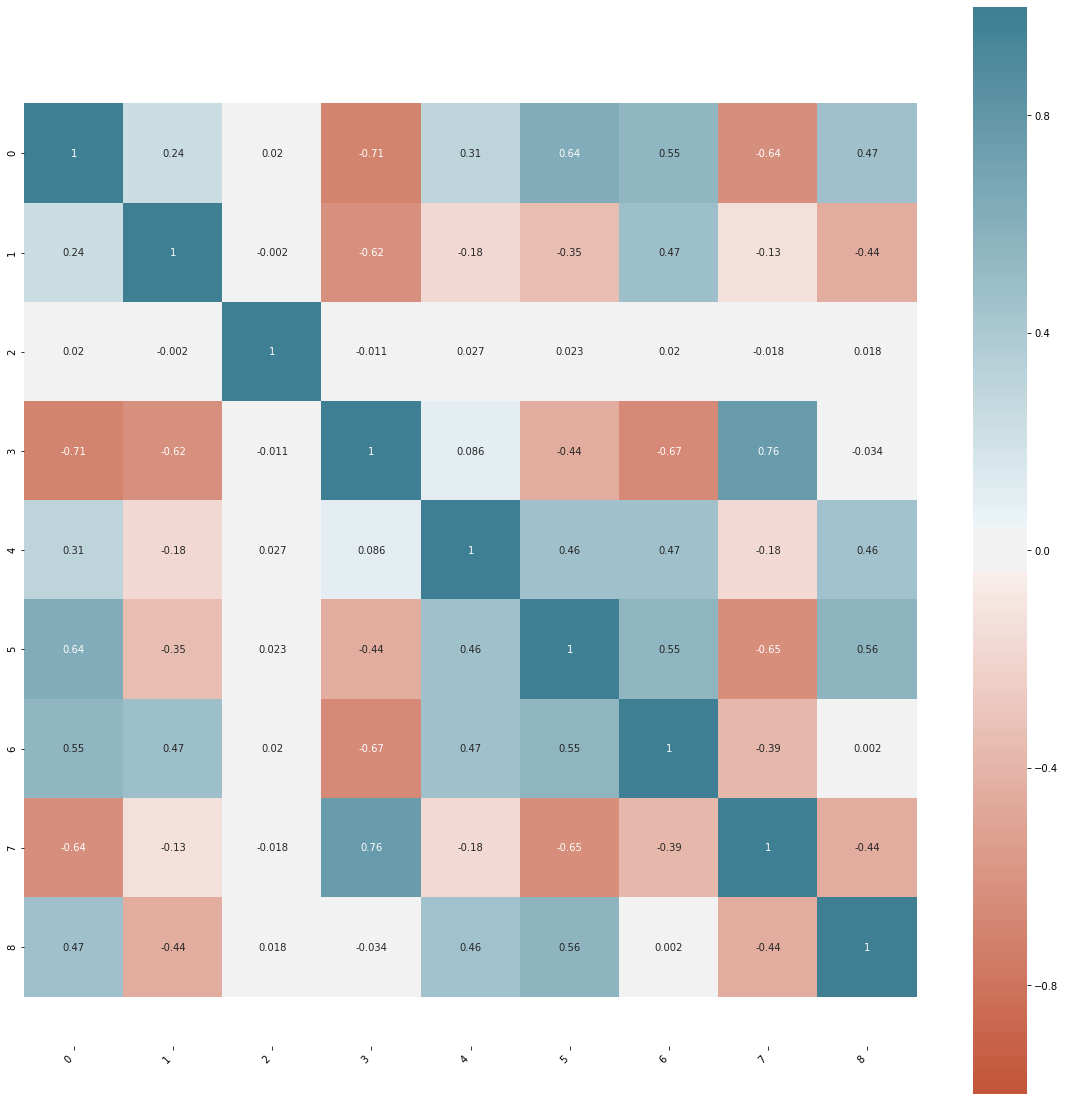

In [11]:
# Draw correlation matrix.
corr = data.corr()

plt.figure(figsize=(20, 20))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [12]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
data.describe()

,0,1,2,3,4,5,6,7,8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.004918,0.982548,0.003020,1.071892,0.995967,-1.869138,-0.001747,0.994744,0.499400
std,2.125161,2.236374,1.016612,2.571314,2.161592,2.587044,2.446634,2.266276,0.500025
min,-7.361942,-6.334871,-3.531879,-6.507147,-6.124101,-10.552410,-8.263252,-6.274545,0.000000
25%,-2.575438,-0.418504,-0.673464,-1.196634,-0.507065,-3.750591,-1.984409,-0.594088,0.000000
50%,-1.448219,1.414705,0.013764,1.182811,1.478394,-1.769049,0.215688,1.373192,0.000000
75%,0.666344,2.548942,0.680873,3.296581,2.529939,0.072616,1.985890,2.617999,1.000000
max,6.445003,7.784181,3.443926,8.484377,7.824402,5.853682,6.944183,7.815690,1.000000


In [13]:
z = np.abs(stats.zscore(data))
data

,0,1,2,3,4,5,6,7,8
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0.0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1.0
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0.0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0.0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0.0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0.0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0.0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1.0
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1.0


In [14]:
len(np.where(z > 3)[0])

59

In [15]:
outliers = list(set(np.where(z > 3)[0]))
dataset = data.drop(outliers,axis = 0).reset_index(drop = True)
display(dataset)

,0,1,2,3,4,5,6,7,8
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0.0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1.0
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0.0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0.0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0.0
...,...,...,...,...,...,...,...,...,...
9937,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0.0
9938,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0.0
9939,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1.0
9940,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1.0


In [16]:
# Split dataset into train and test set
X, y = dataset.iloc[:,:-1], dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [17]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier
depth =[5,6,7,8,9,10]  
for i in depth: 
    decisionTree = DecisionTreeClassifier(max_depth=i, random_state=42)
    decisionTree.fit(X_train,y_train)
    print("For the value of",i, "Accuracy of train:",decisionTree.score(X_train,y_train))
    print("Accuracy of test:",decisionTree.score(X_test,y_test))
    print("***************")
#maxdepth = 7 gives me better result
decisionTree = DecisionTreeClassifier(max_depth=7, random_state=42)
decisionTree.fit(X_train,y_train)

For the value of 5 Accuracy of train: 0.9749964075298175
Accuracy of test: 0.9698290311766677
***************
For the value of 6 Accuracy of train: 0.981462853858313
Accuracy of test: 0.9751927589674824
***************
For the value of 7 Accuracy of train: 0.9877856013795085
Accuracy of test: 0.9795507877975193
***************
For the value of 8 Accuracy of train: 0.9897973846817072
Accuracy of test: 0.9785450888367415
***************
For the value of 9 Accuracy of train: 0.9906595775255065
Accuracy of test: 0.9772041568890378
***************
For the value of 10 Accuracy of train: 0.9932461560569047
Accuracy of test: 0.9755279919544083
***************


DecisionTreeClassifier(max_depth=7, random_state=42)

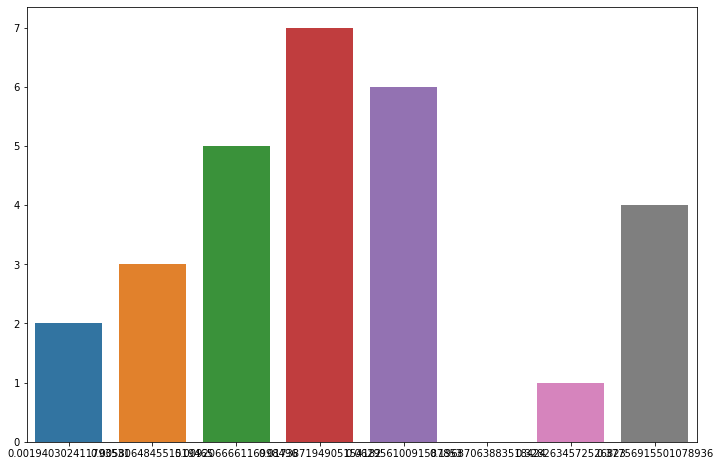

In [18]:
# Visualize feature importances.
plt.figure(figsize=(12, 8))
importance = decisionTree.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [19]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
prediction = decisionTree.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1459
         1.0       0.99      0.97      0.98      1524

    accuracy                           0.98      2983
   macro avg       0.98      0.98      0.98      2983
weighted avg       0.98      0.98      0.98      2983



Confusion Matrix Tree : 
 [[1438   21]
 [  40 1484]] 



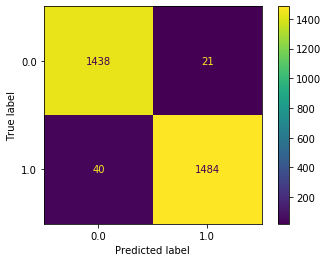

In [31]:
print("Confusion Matrix Tree : \n", confusion_matrix(y_test, prediction),"\n")
plot_confusion_matrix(decisionTree, X_test, y_test)
plt.show()

In [21]:
print("Precision = {}".format(precision_score(y_test, prediction, average='macro')))
print("Recall = {}".format(recall_score(y_test, prediction, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, prediction)))
print("F1 Score = {}".format(f1_score(y_test, prediction,average='macro')))

Precision = 0.9794914560845895
Recall = 0.9796799303445534
Accuracy = 0.9795507877975193
F1 Score = 0.9795459238483785


In [22]:
categories = data[8].value_counts()
categories

0.0    5006
1.0    4994
Name: 8, dtype: int64

In [28]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.

In [41]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000]
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27)
clf = RandomizedSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)
modelxgc = xgc.fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned: {'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01}
Mean of the cv scores is 0.986923
Train Score 0.994971
Test Score 0.988937
Seconds used for refitting the best model on the train dataset: 9.718095


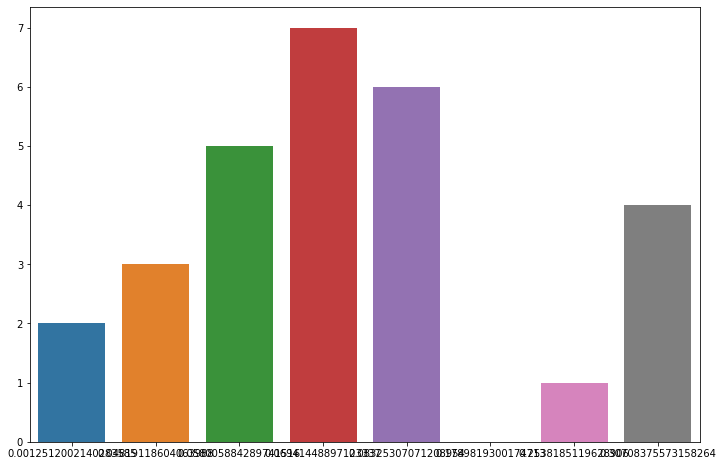

In [43]:
# Visualize feature importances.
plt.figure(figsize=(12, 8))
importance = modelxgc.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

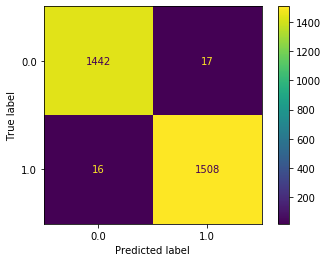

In [44]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
pred = clf.predict(X_test)

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [45]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9889392610582652
Recall = 0.9889247480117076
Accuracy = 0.9889373114314448
F1 Score = 0.9889318932355349


# Evaluate your result and select best performing algorithm for our case.
XGboost considered the weak learners, learn them in sequentially in a very adaptative way and it gives better result in terms of precision, recall, accuracy and F1 score values. The best hyperparameters for xgboost are:

{'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01}
